In [114]:
import numpy as np
import pandas as pd
from pandas import DataFrame , Series
import scipy
from scipy import stats 
import seaborn as sns
import matplotlib.pyplot as plt

In [115]:
df_fifa=pd.read_csv('fifa.csv')

In [116]:
df_fifa

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,https://cdn.sofifa.org/teams/2/light/703.png,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,https://cdn.sofifa.org/teams/2/light/1944.png,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,https://cdn.sofifa.org/teams/2/light/15048.png,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [117]:
df_fi=df_fifa.drop(columns=['Photo','Flag','Club Logo','Jersey Number'],axis=1)

In [118]:
df_fi

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,€1K,Right,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,€1K,Right,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,241638,B. Worman,16,England,47,67,Cambridge United,€60K,€1K,Right,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,€1K,Right,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [119]:
df_fifades=pd.read_csv('fifa_ variable_information.csv')
df_fifades

,ID,unique id for every player
0,Name,name
1,Age,age
2,Photo,url to the player's photo
3,Nationality,nationality
4,Flag,url to players's country flag
5,Overall,overall rating
6,Potential,potential rating
7,Club,current club
8,Club Logo,url to club logo
9,Value,current market value


In [120]:
df_fi.dtypes

ID                            int64
Name                         object
Age                           int64
Nationality                  object
Overall                       int64
Potential                     int64
Club                         object
Value                        object
Wage                         object
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Position                     object
Joined                       object
Loaned From                  object
Contract Valid Until         object
Height                       object
Weight                       object
Crossing                    float64
Finishing                   float64
HeadingAccuracy             float64
ShortPassing                float64
Volleys                     float64
Dribbling                   float64
Curve                       

In [121]:
df_fi.describe()

,ID,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1.113222,2.947299,2.361308,49.734181,45.550911,52.298144,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,0.394031,0.660456,0.756164,18.364524,19.525820,17.379909,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1.000000,3.000000,2.000000,38.000000,30.000000,44.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1.000000,3.000000,2.000000,54.000000,49.000000,56.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1.000000,3.000000,3.000000,64.000000,62.000000,64.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,5.000000,5.000000,5.000000,93.000000,95.000000,94.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [122]:
df_fi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     18207 non-null  object 
 8   Wage                      18207 non-null  object 
 9   Preferred Foot            18159 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Weak Foot                 18159 non-null  float64
 12  Skill Moves               18159 non-null  float64
 13  Work Rate                 18159 non-null  object 
 14  Body T

In [123]:
#Convert to Float after getting rid of currency symbol and suffix
df_fi['Value']=df_fi['Value'].str.strip('€MK')


df_fi['Value']=df_fi['Value'].astype('float64')

df_fi['Value']


0        110.5
1         77.0
2        118.5
3         72.0
4        102.0
         ...  
18202     60.0
18203     60.0
18204     60.0
18205     60.0
18206     60.0
Name: Value, Length: 18207, dtype: float64

In [124]:
#Convert to Float after getting rid of currency symbol and suffix.
df_fi['Wage']=df_fi['Wage'].str.strip('€K')

df_fi['Wage']=df_fi['Wage'].astype('float64')
df_fi['Wage']

0        565.0
1        405.0
2        290.0
3        260.0
4        355.0
         ...  
18202      1.0
18203      1.0
18204      1.0
18205      1.0
18206      1.0
Name: Wage, Length: 18207, dtype: float64

In [125]:
#Convert to int with only year
df_fi['Joined']

df_fi['Joined']=pd.to_datetime(df_fi['Joined']).dt.year

df_fi['Joined']

0        2004.0
1        2018.0
2        2017.0
3        2011.0
4        2015.0
          ...  
18202    2017.0
18203    2018.0
18204    2017.0
18205    2018.0
18206    2018.0
Name: Joined, Length: 18207, dtype: float64

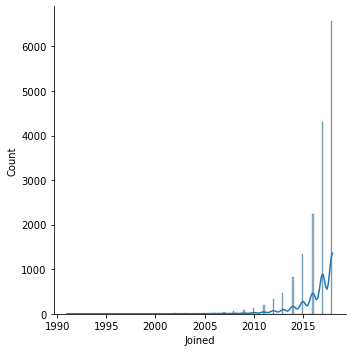

In [126]:
plt.rcParams['figure.figsize']=[10,8]
sns.displot(df_fi['Joined'],kde=True)
plt.show()

In the graph we can see that the joined variable is left skewed

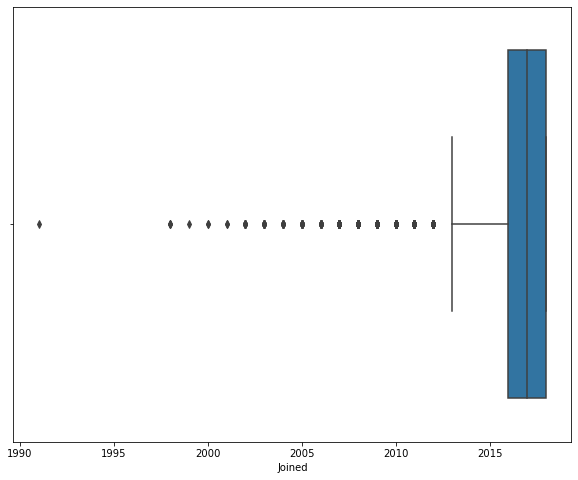

In [127]:
sns.boxplot(x=df_fi['Joined'])
plt.show()

I the above boxplot of joined , there is the presence of outliers.

In [128]:
#Remove the suffix and convert to float
df_fi['Weight']=df_fi['Weight'].str.strip('lbs')

df_fi['Weight']=df_fi['Weight'].astype('float64')
df_fi['Weight']

0        159.0
1        183.0
2        150.0
3        168.0
4        154.0
         ...  
18202    134.0
18203    170.0
18204    148.0
18205    154.0
18206    176.0
Name: Weight, Length: 18207, dtype: float64

In [129]:
#Convert to Float after getting rid of currency symbol and suffix.
df_fi['Release Clause']=df_fi['Release Clause'].str.strip('€MK')

df_fi['Release Clause']=df_fi['Release Clause'].astype('float64')

df_fi['Release Clause']

0        226.5
1        127.1
2        228.1
3        138.6
4        196.4
         ...  
18202    143.0
18203    113.0
18204    165.0
18205    143.0
18206    165.0
Name: Release Clause, Length: 18207, dtype: float64

In [130]:
#Convert to datetime type
df_fi['Contract Valid Until']=pd.to_datetime(df_fi['Contract Valid Until'])
df_fi['Contract Valid Until']

0       2021-01-01
1       2022-01-01
2       2022-01-01
3       2020-01-01
4       2023-01-01
           ...    
18202   2019-01-01
18203   2020-01-01
18204   2021-01-01
18205   2019-01-01
18206   2019-01-01
Name: Contract Valid Until, Length: 18207, dtype: datetime64[ns]

In [131]:
df_fi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        18207 non-null  int64         
 1   Name                      18207 non-null  object        
 2   Age                       18207 non-null  int64         
 3   Nationality               18207 non-null  object        
 4   Overall                   18207 non-null  int64         
 5   Potential                 18207 non-null  int64         
 6   Club                      17966 non-null  object        
 7   Value                     18207 non-null  float64       
 8   Wage                      18207 non-null  float64       
 9   Preferred Foot            18159 non-null  object        
 10  International Reputation  18159 non-null  float64       
 11  Weak Foot                 18159 non-null  float64       
 12  Skill Moves       

In [132]:
df_fi.isnull().values.any()

True

In [133]:
missingvalue=df_fi.isnull().sum()
missingvalue


ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          241
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys                        48
Dribbling                      48
Curve                          48
FKAccuracy                     48
LongPassing   

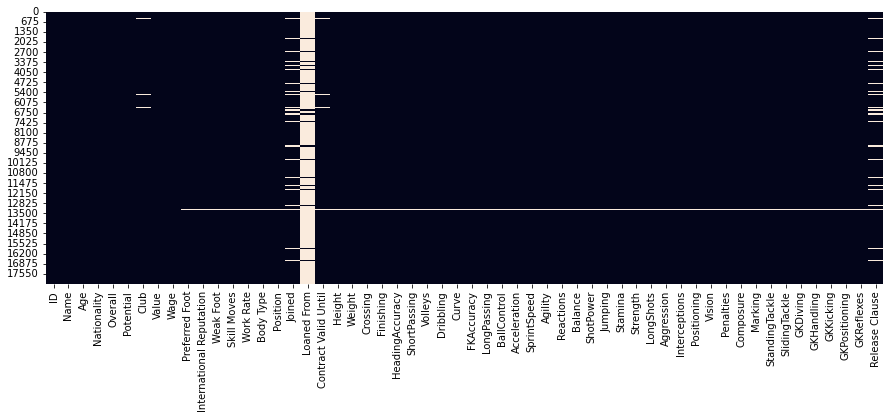

In [134]:
plt.rcParams['figure.figsize']=[15,5]
sns.heatmap(df_fi.isnull(),cbar=False)
plt.show()

In [135]:
missingvalue
total=df_fi.isnull().sum().sort_values(ascending=False)
percentage=round(((df_fi.isnull().sum()/df_fi.shape[0])*100),2)
percentage = percentage.sort_values(ascending=False)
missing_data=pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
missing_data['Type']=df_fi[missing_data.index].dtypes
missing_data

,Total,Percentage,Type
Loaned From,16943,93.06,object
Release Clause,1564,8.59,float64
Joined,1553,8.53,float64
Contract Valid Until,289,1.59,datetime64[ns]
Club,241,1.32,object
Position,60,0.33,object
GKHandling,48,0.26,float64
GKDiving,48,0.26,float64
Agility,48,0.26,float64
Reactions,48,0.26,float64


**Interpretation :** The variable 'Loned From' has 93.06% of missing data that why we are excluding the data from further analysis.
variable 'Release Clause' and 'Joined' have 8.59% and 8.53% of missing data which is very small that can be compute by mean or median as it will not affect our analysis
same hypothesis can be applied to other variable as well as they have very small missing value.

In [136]:
df_fi=df_fi.drop(columns=['Loaned From'],axis=1)

### Let us now consider each variable separately for missing value treatment

### 1.The variable International Reputation

The variable international reputation is a numerical variable

In [137]:
df_fi['International Reputation'].isnull().values.any()

True

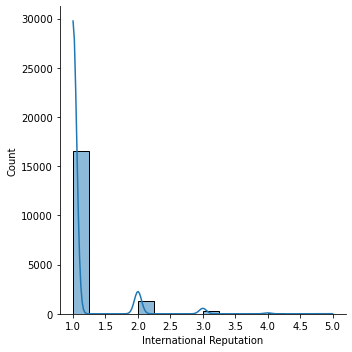

In [138]:
sns.displot(df_fi['International Reputation'],kde=True)
plt.show()

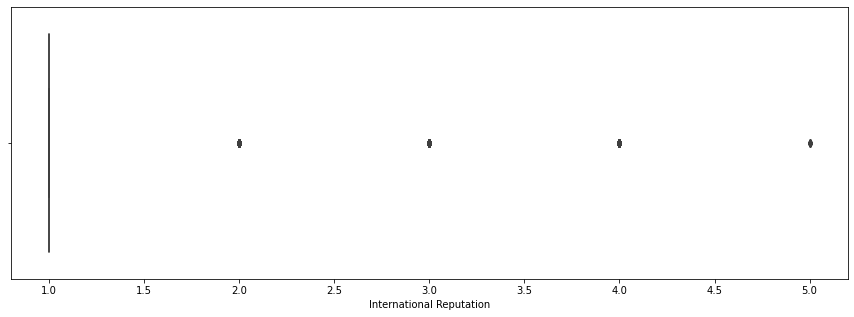

In [139]:
sns.boxplot(x=df_fi['International Reputation'])
plt.show()

By both the graph we can see that there is presence of extrme outlier and data is right skewed.

In [140]:
df_fi['International Reputation'].isnull().sum()

48

There are 48 missing values detected by Python

In [141]:
# Make a copy of datafr# make a copy of the dataframe so that we can use it afterwards if required
 
df_fi2=df_fi.copy()

In [142]:
df_fi['International Reputation'].replace(0,np.NAN,inplace=True)

In [143]:
df_fi['International Reputation'].describe()

count    18159.000000
mean         1.113222
std          0.394031
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: International Reputation, dtype: float64

In [144]:
med=df_fi['International Reputation'].median()
df_fi['International Reputation'].fillna(med).describe()

count    18207.000000
mean         1.112924
std          0.393554
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: International Reputation, dtype: float64

In [145]:
me=df_fi['International Reputation'].mean()
df_fi['International Reputation'].fillna(me).describe()

count    18207.000000
mean         1.113222
std          0.393511
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: International Reputation, dtype: float64

**Interpretation** : By above analysis we can see that the putting mean and median in place of missing value does not change the summary statistics of the variable, however when the null value is replace by mean the median and standard devision of original data is retained.
so replacing the missing value with the mean.

In [146]:
# fill the missing values with mean
# inplace: makes permanent changes in the dataframe
df_fi['International Reputation'].fillna(me,inplace=True)

In [147]:
df_fi['International Reputation'].describe()

count    18207.000000
mean         1.113222
std          0.393511
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: International Reputation, dtype: float64

In [148]:
df_fi['International Reputation'].isnull().sum()

0

### 2. The Variable Joined

the variable joined showed the data of the player joining data

In [149]:
df_fi['Joined']

0        2004.0
1        2018.0
2        2017.0
3        2011.0
4        2015.0
          ...  
18202    2017.0
18203    2018.0
18204    2017.0
18205    2018.0
18206    2018.0
Name: Joined, Length: 18207, dtype: float64

In [150]:
# finding the null value of variable
df_fi['Joined'].isnull().sum()

1553

In [151]:
df_fi['Joined'].describe(include='object')

count    16654.000000
mean      2016.459829
std          2.105924
min       1991.000000
25%       2016.000000
50%       2017.000000
75%       2018.000000
max       2018.000000
Name: Joined, dtype: float64

In [152]:
mo=df_fi['Joined'].mode()
mo

0    2018.0
Name: Joined, dtype: float64

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Joined', ylabel='Density'>

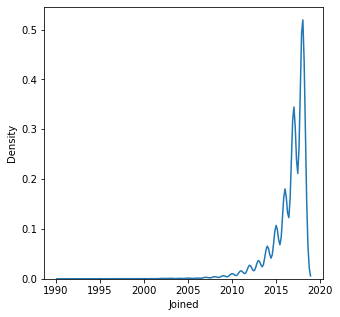

In [153]:
plt.rcParams['figure.figsize']=[5,5]
sns.distplot(df_fi['Joined'],hist=False )

In [154]:
#filling the missing value with mode
df_fi['Joined'].fillna('2018',inplace=True)

In [155]:
df_fi['Joined'].isnull().sum()

0

### 3. The Variable Height

The variable is numerical variable.

In [156]:

df_fi['Height']

0         5'7
1         6'2
2         5'9
3         6'4
4        5'11
         ... 
18202     5'9
18203     6'3
18204     5'8
18205    5'10
18206    5'10
Name: Height, Length: 18207, dtype: object

In [157]:
df_fi['Height'].isnull().sum()

48

In [158]:

df_fi['Height'].unique()

array(["5'7", "6'2", "5'9", "6'4", "5'11", "5'8", "6'0", "5'6", "5'10",
       "6'6", "6'1", "5'4", "6'3", "5'5", "6'5", "6'7", "5'3", "5'2",
       "6'8", "5'1", "6'9", nan], dtype=object)

In [159]:
#replacing all nan to np.nan
df_fi['Height'].replace('nan',np.nan,inplace=True)

In [160]:
dfh=df_fi['Height']
dfh

0         5'7
1         6'2
2         5'9
3         6'4
4        5'11
         ... 
18202     5'9
18203     6'3
18204     5'8
18205    5'10
18206    5'10
Name: Height, Length: 18207, dtype: object

In [161]:
dfh

0         5'7
1         6'2
2         5'9
3         6'4
4        5'11
         ... 
18202     5'9
18203     6'3
18204     5'8
18205    5'10
18206    5'10
Name: Height, Length: 18207, dtype: object

In [162]:
dfh=dfh.str.split("'",expand=True)
dfh.columns=['feet','inches']
dfh[['feet','inches']]=dfh[['feet','inches']].astype('float64')
dfh

,feet,inches
0,5.0,7.0
1,6.0,2.0
2,5.0,9.0
3,6.0,4.0
4,5.0,11.0
...,...,...
18202,5.0,9.0
18203,6.0,3.0
18204,5.0,8.0
18205,5.0,10.0


In [163]:
dfh['confeet']=dfh['feet']*30.48
dfh['coninche']=dfh['inches']*2.54

dfh['convtheight']=dfh['confeet']+dfh['coninche']

In [164]:
dfh

,feet,inches,confeet,coninche,convtheight
0,5.0,7.0,152.40,17.78,170.18
1,6.0,2.0,182.88,5.08,187.96
2,5.0,9.0,152.40,22.86,175.26
3,6.0,4.0,182.88,10.16,193.04
4,5.0,11.0,152.40,27.94,180.34
...,...,...,...,...,...
18202,5.0,9.0,152.40,22.86,175.26
18203,6.0,3.0,182.88,7.62,190.50
18204,5.0,8.0,152.40,20.32,172.72
18205,5.0,10.0,152.40,25.40,177.80


In [165]:
#replacing the value of heght variable from string to Float with decimal points and in cm
df_fi['Height']=dfh['convtheight']

In [166]:
df_fi['Height']

0        170.18
1        187.96
2        175.26
3        193.04
4        180.34
          ...  
18202    175.26
18203    190.50
18204    172.72
18205    177.80
18206    177.80
Name: Height, Length: 18207, dtype: float64

In [167]:
#finding the missing value
df_fi['Height'].isnull().sum()

48

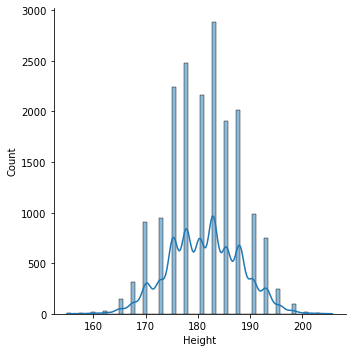

In [168]:
plt.rcParams['figure.figsize']=[5,5]
sns.displot(df_fi['Height'],kde=True)
plt.show()

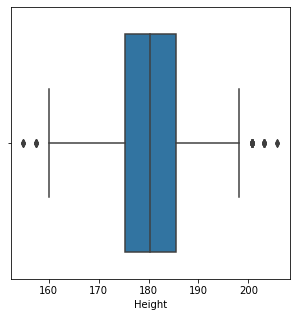

In [169]:
sns.boxplot(x=df_fi['Height'])
plt.show()

By the above graph we can see that the distribution is somewhat normally distributed

In [170]:
df_fi['Height'].describe()

count    18159.000000
mean       181.257584
std          6.730145
min        154.940000
25%        175.260000
50%        180.340000
75%        185.420000
max        205.740000
Name: Height, dtype: float64

In [171]:
med=df_fi['Height'].median()
df_fi['Height'].fillna(med,inplace=True)

In [172]:
df_fi['Height'].isnull().sum()

0

### 4. The Variable Contact Valid

In [173]:
df_fi['Contract Valid Until'].isnull().sum()

289

Variable is categorial 

In [174]:
df_fi['Contract Valid Until'].describe(datetime_is_numeric=True)

count                            17918
mean     2020-03-08 03:08:17.868065792
min                2018-01-01 00:00:00
25%                2019-01-01 00:00:00
50%                2020-01-01 00:00:00
75%                2021-01-01 00:00:00
max                2026-01-01 00:00:00
Name: Contract Valid Until, dtype: object

In [175]:
mocvu=df_fi['Contract Valid Until'].mode()
mocvu

0   2019-01-01
Name: Contract Valid Until, dtype: datetime64[ns]

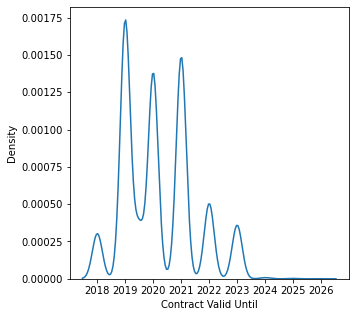

In [176]:
sns.kdeplot(df_fi['Contract Valid Until'])
plt.show()


In [177]:
df_fi['Contract Valid Until'].fillna(mocvu).describe(datetime_is_numeric=True)

count                            17918
mean     2020-03-08 03:08:17.868065792
min                2018-01-01 00:00:00
25%                2019-01-01 00:00:00
50%                2020-01-01 00:00:00
75%                2021-01-01 00:00:00
max                2026-01-01 00:00:00
Name: Contract Valid Until, dtype: object

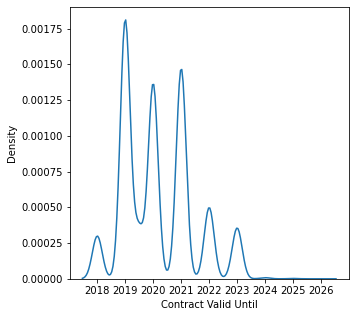

In [178]:
sns.kdeplot(df_fi['Contract Valid Until'].fillna('2019-01-01'))
plt.show()

By the above analysis we can see that the filling missing value with mode has no such effect on the original data 

In [179]:
df_fi['Contract Valid Until'].fillna('2019-01-01',inplace=True)

In [180]:
df_fi['Contract Valid Until'].isnull().sum()

0

### 4 The Variable Weight

In [181]:
df_fi['Weight']

0        159.0
1        183.0
2        150.0
3        168.0
4        154.0
         ...  
18202    134.0
18203    170.0
18204    148.0
18205    154.0
18206    176.0
Name: Weight, Length: 18207, dtype: float64

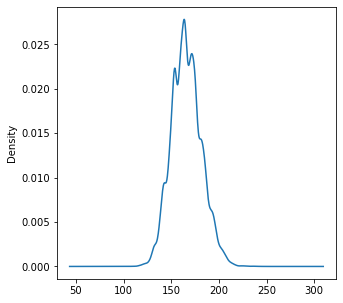

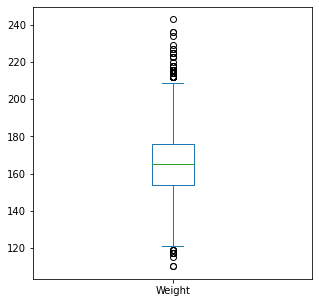

In [182]:
df_fi['Weight'].plot(kind='kde')

plt.show()

df_fi['Weight'].plot(kind='box')
plt.show()

In [183]:
df_fi['Weight'].isnull().sum()

48

kde plot shows that the variable weight is somewhat normally distributed and has the null value = 48
there is also the presence of outliers
the avg weight of players lies in between the ~ 150 and 175

In [184]:
#Treating the missing value
df_fi['Weight'].describe()

count    18159.000000
mean       165.979129
std         15.593344
min        110.000000
25%        154.000000
50%        165.000000
75%        176.000000
max        243.000000
Name: Weight, dtype: float64

In [185]:
med=df_fi['Weight'].median()
med

165.0

In [186]:
df_fi['Weight'].fillna(med).describe()

count    18207.000000
mean       165.976547
std         15.572856
min        110.000000
25%        154.000000
50%        165.000000
75%        176.000000
max        243.000000
Name: Weight, dtype: float64

In [187]:
df_fi['Weight'].fillna(med,inplace=True)

In [188]:
df_fi['Weight'].isnull().sum()

0

### 5. The variable Release Clause

Variable is numerical in nature 

In [189]:
df_fi['Release Clause']

0        226.5
1        127.1
2        228.1
3        138.6
4        196.4
         ...  
18202    143.0
18203    113.0
18204    165.0
18205    143.0
18206    165.0
Name: Release Clause, Length: 18207, dtype: float64

In [190]:
df_fi['Release Clause'].describe()

count    16643.000000
mean       228.201274
std        299.251866
min          1.000000
25%          2.500000
50%         19.800000
75%        431.000000
max        999.000000
Name: Release Clause, dtype: float64

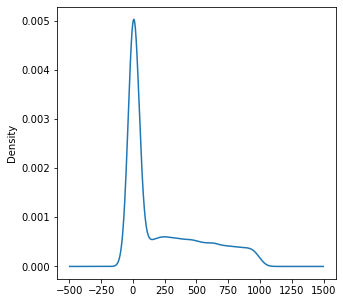

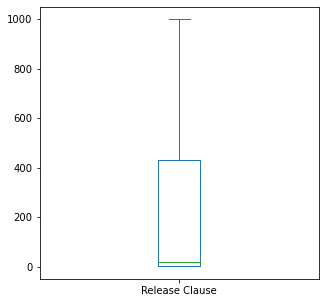

In [191]:
df_fi['Release Clause'].plot(kind='kde')
plt.show()
df_fi['Release Clause'].plot(kind='box')
plt.show()

In [192]:
df_fi['Release Clause'].isnull().sum()

1564

In [193]:
med=df_fi['Release Clause'].median()
med

19.8

In [194]:
df_fi['Release Clause'].fillna(med).describe()

count    18207.000000
mean       210.299390
std        292.008837
min          1.000000
25%          2.900000
50%         19.800000
75%        385.000000
max        999.000000
Name: Release Clause, dtype: float64

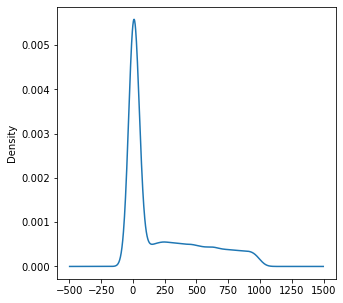

In [195]:
df_fi['Release Clause'].fillna(med).plot(kind='kde')
plt.show()

Putting the median inplace of missing value does not affect the original distribution of over data

In [196]:
df_fi['Release Clause'].fillna(med,inplace=True)

In [197]:
df_fi['Release Clause'].isnull().sum()

0

### 6. The Variable Position

The variable is categorial data

In [198]:
df_fi['Position']

0         RF
1         ST
2         LW
3         GK
4        RCM
        ... 
18202     CM
18203     ST
18204     ST
18205     RW
18206     CM
Name: Position, Length: 18207, dtype: object

In [199]:
df_fi['Position'].describe(include=object)

count     18147
unique       27
top          ST
freq       2152
Name: Position, dtype: object

In [200]:
mod=df_fi['Position'].mode()
mod

0    ST
Name: Position, dtype: object

<AxesSubplot:xlabel='Position', ylabel='count'>

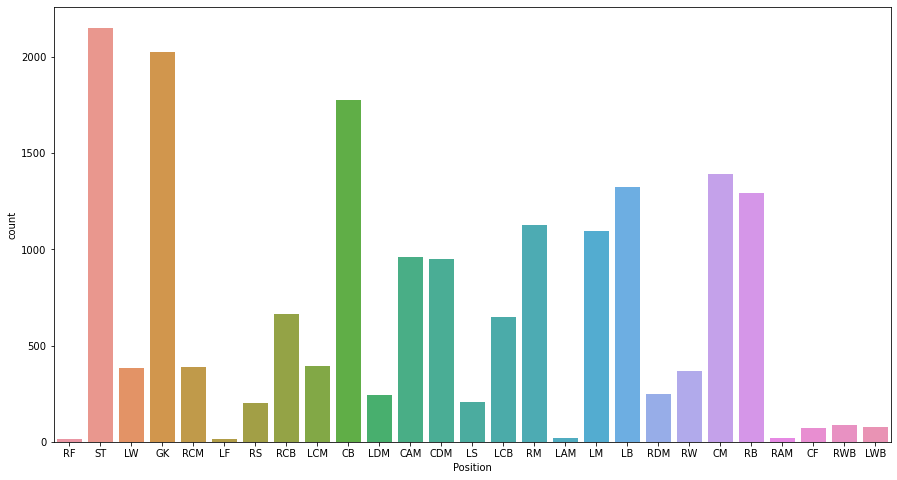

In [201]:
plt.figure(figsize=(15,8))
sns.countplot(x=df_fi['Position'])

<AxesSubplot:xlabel='Position', ylabel='count'>

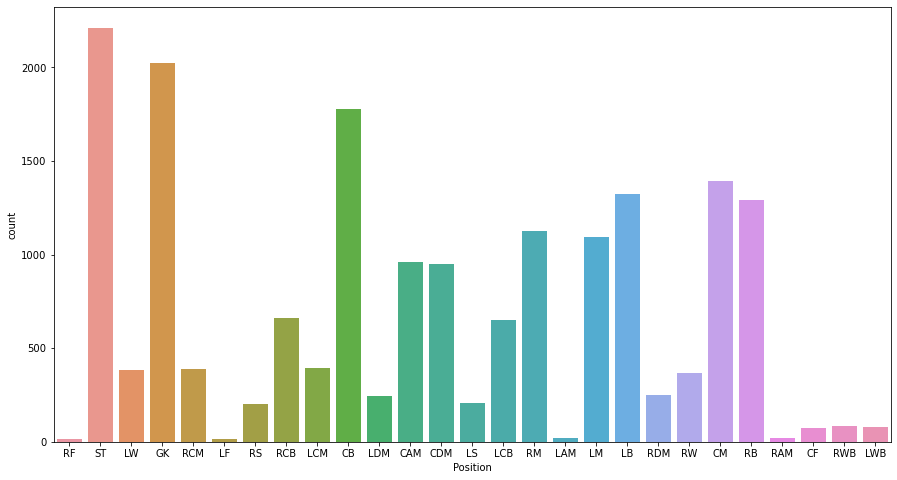

In [202]:
plt.rcParams['figure.figsize']=[15,8]
sns.countplot(x=df_fi['Position'].fillna('ST'))

In [203]:
df_fi['Position'].fillna('ST',inplace=True)

In [204]:
df_fi['Position'].isnull().sum()

0

Lets Find the Correlation between the variables

In [205]:
# making another dataframe of cleared data and required variable
df_cl=df_fi[['ID', 'Name', 'Age', 'Potential', 'Overall','Value', 'Wage', 'International Reputation','Position','Joined', 'Contract Valid Until', 'Height', 'Weight',  'Release Clause']]

In [206]:
df_cl.head(5)

,ID,Name,Age,Potential,Overall,Value,Wage,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,94,94,110.5,565.0,5.0,RF,2004.0,2021-01-01,170.18,159.0,226.5
1,20801,Cristiano Ronaldo,33,94,94,77.0,405.0,5.0,ST,2018.0,2022-01-01,187.96,183.0,127.1
2,190871,Neymar Jr,26,93,92,118.5,290.0,5.0,LW,2017.0,2022-01-01,175.26,150.0,228.1
3,193080,De Gea,27,93,91,72.0,260.0,4.0,GK,2011.0,2020-01-01,193.04,168.0,138.6
4,192985,K. De Bruyne,27,92,91,102.0,355.0,4.0,RCM,2015.0,2023-01-01,180.34,154.0,196.4


In [207]:
df_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        18207 non-null  int64         
 1   Name                      18207 non-null  object        
 2   Age                       18207 non-null  int64         
 3   Potential                 18207 non-null  int64         
 4   Overall                   18207 non-null  int64         
 5   Value                     18207 non-null  float64       
 6   Wage                      18207 non-null  float64       
 7   International Reputation  18207 non-null  float64       
 8   Position                  18207 non-null  object        
 9   Joined                    18207 non-null  object        
 10  Contract Valid Until      18207 non-null  datetime64[ns]
 11  Height                    18207 non-null  float64       
 12  Weight            

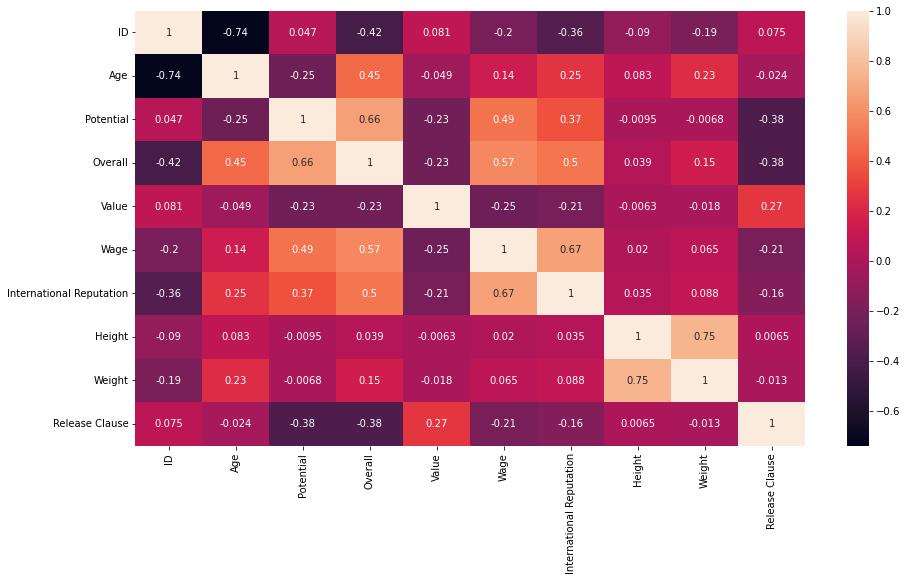

In [208]:
sns.heatmap(df_cl.corr(),annot=True)
plt.show()

In [209]:
df_cl.corr()

,ID,Age,Potential,Overall,Value,Wage,International Reputation,Height,Weight,Release Clause
ID,1.000000,-0.739208,0.047074,-0.417025,0.081168,-0.204610,-0.355759,-0.090173,-0.191231,0.075183
Age,-0.739208,1.000000,-0.253312,0.452350,-0.048715,0.141145,0.253464,0.082514,0.229943,-0.024416
Potential,0.047074,-0.253312,1.000000,0.660939,-0.231048,0.486413,0.372375,-0.009528,-0.006814,-0.379652
Overall,-0.417025,0.452350,0.660939,1.000000,-0.233330,0.571926,0.499243,0.038747,0.154658,-0.379935
Value,0.081168,-0.048715,-0.231048,-0.233330,1.000000,-0.247034,-0.207539,-0.006251,-0.018459,0.269021
Wage,-0.204610,0.141145,0.486413,0.571926,-0.247034,1.000000,0.668515,0.019769,0.064825,-0.207147
International Reputation,-0.355759,0.253464,0.372375,0.499243,-0.207539,0.668515,1.000000,0.034880,0.088340,-0.156247
Height,-0.090173,0.082514,-0.009528,0.038747,-0.006251,0.019769,0.034880,1.000000,0.754678,0.006535
Weight,-0.191231,0.229943,-0.006814,0.154658,-0.018459,0.064825,0.088340,0.754678,1.000000,-0.013315
Release Clause,0.075183,-0.024416,-0.379652,-0.379935,0.269021,-0.207147,-0.156247,0.006535,-0.013315,1.000000


1.	Plot the distribution of Overall rating for all players. 

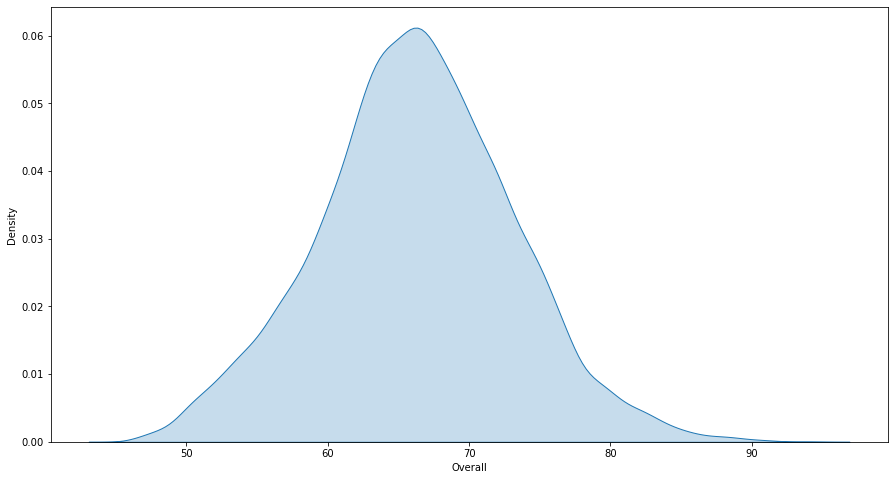

In [210]:
sns.kdeplot(df_cl['Overall'],shade='fill',cbar=True)
plt.show()

By the above analysis we can see that the distribution of overall variable is somewhat normal

2.	Generate pair plots for the following variables:
Overall, Value, Wage, International Reputation, Height, Weight, Release Clause


In [211]:
df_cl.columns

Index(['ID', 'Name', 'Age', 'Potential', 'Overall', 'Value', 'Wage',
       'International Reputation', 'Position', 'Joined',
       'Contract Valid Until', 'Height', 'Weight', 'Release Clause'],
      dtype='object')

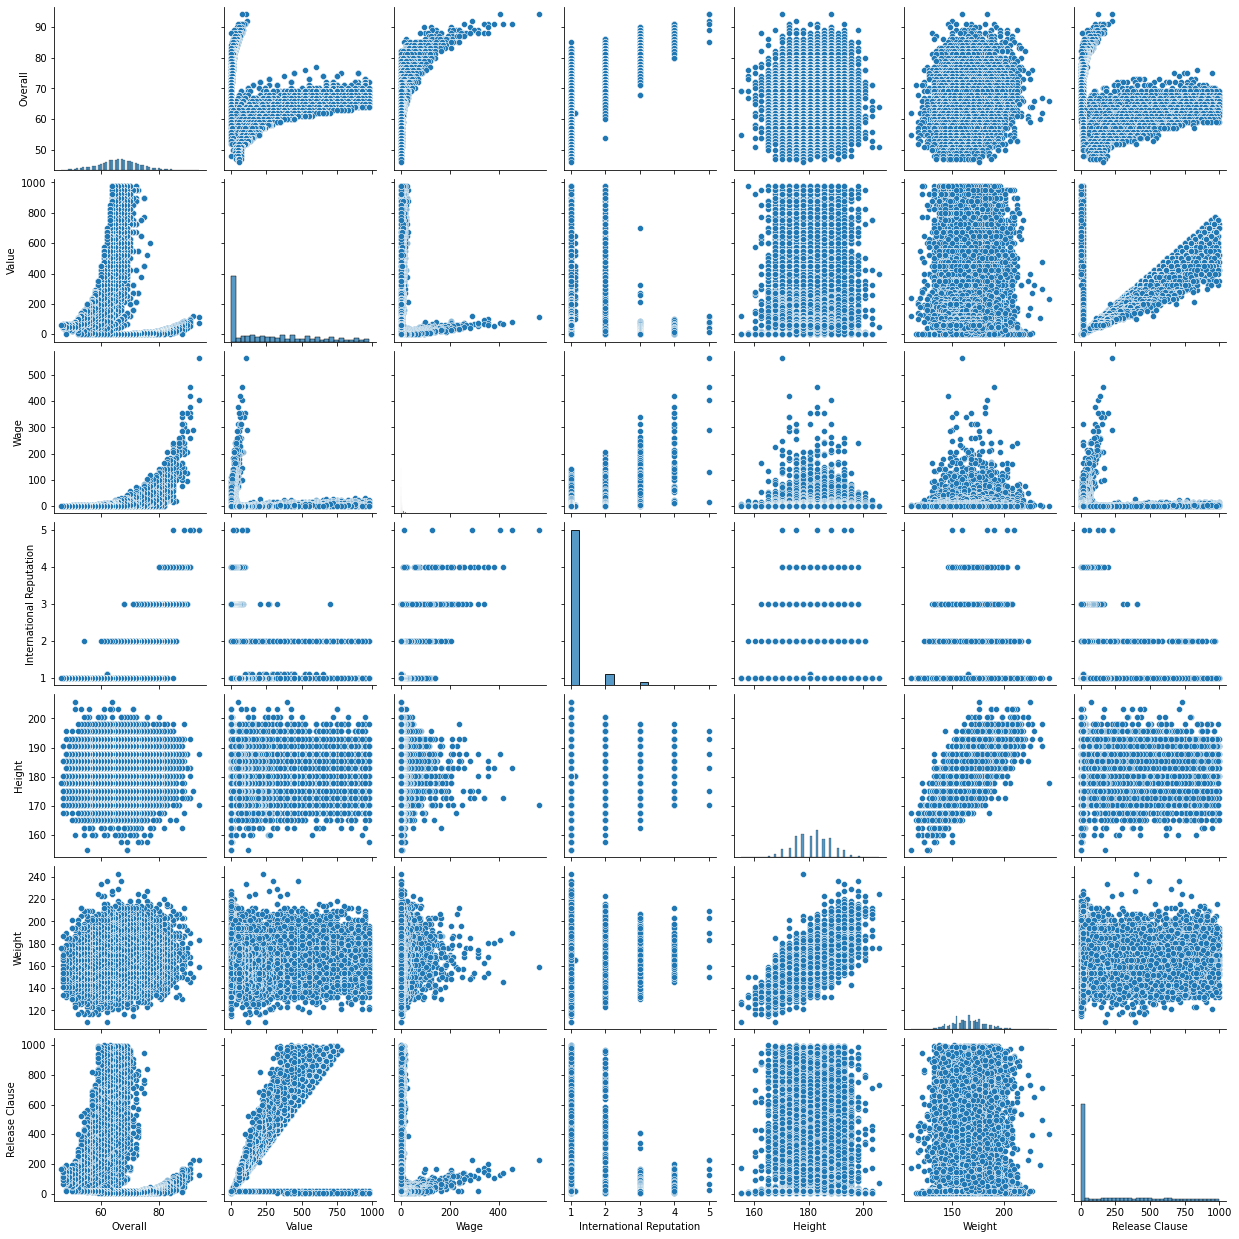

In [212]:
sns.pairplot(df_cl[['Overall','Value','Wage','International Reputation','Height','Weight','Release Clause']],diag_kind="hist")
plt.show()

3.	Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.

In [213]:
df_top=df_cl[df_cl['Contract Valid Until']=='2020'].sort_values(by='Overall',ascending=False).head(20)
df_top

,ID,Name,Age,Potential,Overall,Value,Wage,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
3,193080,De Gea,27,93,91,72.0,260.0,4.0,GK,2011.0,2020-01-01,193.04,168.0,138.6
6,177003,L. Modrić,32,91,91,67.0,420.0,4.0,RCM,2012.0,2020-01-01,172.72,146.0,137.4
8,155862,Sergio Ramos,32,91,91,51.0,380.0,4.0,RCB,2005.0,2020-01-01,182.88,181.0,104.6
5,183277,E. Hazard,27,91,91,93.0,340.0,4.0,LF,2012.0,2020-01-01,172.72,163.0,172.1
13,168542,David Silva,32,90,90,60.0,285.0,4.0,LCM,2010.0,2020-01-01,172.72,148.0,111.0
21,179813,E. Cavani,31,89,89,60.0,200.0,4.0,LS,2013.0,2020-01-01,185.42,170.0,111.0
24,138956,G. Chiellini,33,89,89,27.0,215.0,4.0,LCB,2005.0,2020-01-01,187.96,187.0,44.6
31,190460,C. Eriksen,26,91,88,73.5,205.0,3.0,CAM,2013.0,2020-01-01,180.34,168.0,141.5
39,164240,Thiago Silva,33,88,88,24.0,165.0,4.0,RCB,2012.0,2020-01-01,182.88,181.0,44.4
50,175943,D. Mertens,31,87,87,45.0,135.0,3.0,RF,2013.0,2020-01-01,170.18,134.0,76.5


a)	What would the average wage for this set of players be?

In [214]:
print("The average wage of top 20 players by overall rating is=",df_top['Wage'].mean())

The average wage of top 20 players by overall rating is= 205.45


b)	What is the average age?

In [215]:
print("The average age of top 20 players by overall rating is=",df_top['Age'].mean())


The average age of top 20 players by overall rating is= 30.65


c)	Is there a correlation between the Overall rating and Value for these players?

In [216]:
df_cor=df_top[['Overall','Value']]
cor=df_cor.corr()
print('Yes it is-',cor.iloc[0,1])

Yes it is- 0.7867166042074153


4. Generate tables containing the top 5 players by Overall rating for each unique position

In [217]:
df_top5=df_cl[['Name','Position','Overall']]
df_to5=pd.pivot_table(df_top5,index=['Position','Name'])
df_to5

Overall
Position Name                 
CAM      A. Adouyev       62.0
         A. Ajagun        69.0
         A. Aktas         54.0
         A. Al Fraidi     67.0
         A. Al Nazera     62.0
...                        ...
ST       Zé Turbo         67.0
         Álex López       66.0
         Álvaro           70.0
         Ángel            79.0
         Éder             75.0

[18096 rows x 1 columns]

In [218]:
df1=df_cl.groupby(['Position']).mean().T
l1=df1.columns

In [219]:
l1

Index(['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LAM', 'LB', 'LCB', 'LCM', 'LDM',
       'LF', 'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF',
       'RM', 'RS', 'RW', 'RWB', 'ST'],
      dtype='object', name='Position')

In [220]:
df2=df_to5.loc[l1[0]].sort_values('Overall',ascending=False).head(5)
df2

,Overall
Name,
A. Griezmann,89.0
C. Eriksen,88.0
M. Özil,86.0
Roberto Firmino,86.0
T. Müller,86.0


In [221]:
df2=df_to5.loc[l1[0]].sort_values('Overall',ascending=False).head(5)
for i in range(1,len(l1)):
    df3=df_to5.loc[l1[i]].sort_values('Overall',ascending=False).head(5)
    df2=pd.concat([df2,df3])

In [222]:
df2

,Overall
Name,
A. Griezmann,89.0
C. Eriksen,88.0
M. Özil,86.0
Roberto Firmino,86.0
T. Müller,86.0
...,...
Cristiano Ronaldo,94.0
R. Lewandowski,90.0
H. Kane,89.0


In [223]:
df4=pd.merge(df2,df_cl[['ID','Name','Position','Overall','Wage']],on=['Name','Overall'],how='left')                 
df4

,Name,Overall,ID,Position,Wage
0,A. Griezmann,89.0,194765,CAM,145.0
1,C. Eriksen,88.0,190460,CAM,205.0
2,M. Özil,86.0,176635,CAM,190.0
3,Roberto Firmino,86.0,201942,CAM,195.0
4,T. Müller,86.0,189596,CAM,135.0
...,...,...,...,...,...
130,Cristiano Ronaldo,94.0,20801,ST,405.0
131,R. Lewandowski,90.0,188545,ST,205.0
132,H. Kane,89.0,202126,ST,205.0
133,S. Agüero,89.0,153079,ST,300.0


In [224]:
final_df=df4.groupby(['Position','Name']).mean()



In [225]:
final_df.head(10)

Overall        ID   Wage
Position Name                                     
CAM      A. Griezmann        89.0  194765.0  145.0
         C. Eriksen          88.0  190460.0  205.0
         M. Özil             86.0  176635.0  190.0
         Roberto Firmino     86.0  201942.0  195.0
         T. Müller           86.0  189596.0  135.0
CB       D. Godín            90.0  182493.0  125.0
         M. Benatia          86.0  177509.0  160.0
         N. Otamendi         85.0  192366.0  170.0
         S. Umtiti           87.0  205600.0  205.0
         V. Kompany          85.0  139720.0  170.0

a)	Are there any players appearing in more than one Table. Please point out such players.

In [226]:
for i in range(0,len(l1)):
    print("For",l1[i])
    print(final_df.loc[l1[i]])
    print()
    

For CAM
                 Overall        ID   Wage
Name                                     
A. Griezmann        89.0  194765.0  145.0
C. Eriksen          88.0  190460.0  205.0
M. Özil             86.0  176635.0  190.0
Roberto Firmino     86.0  201942.0  195.0
T. Müller           86.0  189596.0  135.0

For CB
             Overall        ID   Wage
Name                                 
D. Godín        90.0  182493.0  125.0
M. Benatia      86.0  177509.0  160.0
N. Otamendi     85.0  192366.0  170.0
S. Umtiti       87.0  205600.0  205.0
V. Kompany      85.0  139720.0  170.0

For CDM
                 Overall        ID   Wage
Name                                     
Casemiro            88.0  200145.0  285.0
Fabinho             84.0  209499.0  120.0
Fernandinho         86.0  135507.0  185.0
M. Pjanić           86.0  180206.0  180.0
Sergio Busquets     89.0  189511.0  315.0

For CF
              Overall        ID  Wage
Name                                 
A. Milik         81.0  205175.0  71.0

In [227]:
dup1=final_df[final_df.duplicated(keep=False)]
dup2=dup1.drop_duplicates('ID')

In [228]:
dup2.count()

Overall    0
ID         0
Wage       0
dtype: int64

b)	What is the average wage one can expect to pay for the top 5 in every position?

In [229]:
wage=final_df.groupby(['Position']).mean()
print('Average wage to be paid to top 5 players by position is as follows:')
wage['Wage']

Average wage to be paid to top 5 players by position is as follows:


Position
CAM    174.0
CB     166.0
CDM    217.0
CF      47.4
CM     130.6
GK     192.8
LAM     81.6
LB     177.2
LCB    162.0
LCM    184.4
LDM    138.0
LF     123.2
LM     152.6
LS     130.2
LW     261.0
LWB     33.0
RAM     46.6
RB     155.4
RCB    219.0
RCM    238.6
RDM    105.0
RF     148.0
RM     126.4
RS     130.4
RW     202.0
RWB     44.2
ST     294.0
Name: Wage, dtype: float64

Final Team of 20

In [230]:
striker=df_cl[((df_cl['Position']=='CF')|(df_cl['Position']=='ST'))&(df_cl['Contract Valid Until']<='2020')][['Name','Overall','Position','Potential','Value','Release Clause']].sort_values(by='Overall',ascending=False).head(2)

striker_top=df_cl[(df_cl['Position']=='CF')|(df_cl['Position']=='ST')][['Name','Overall','Position','Potential','Value','Release Clause']].sort_values(by='Overall',ascending=False).head(2)

Right_forward=df_cl[((df_cl['Position']=='RF')|(df_cl['Position']=='RS')|(df_cl['Position']=='RW')|(df_cl['Position']=='RAM'))&(df_cl['Contract Valid Until']<='2020')][['Name','Overall','Position','Potential','Value','Release Clause']].sort_values(by='Overall',ascending=False).head(1)

R_striker=df_cl[(df_cl['Position']=='RF')|(df_cl['Position']=='RS')|(df_cl['Position']=='RW')|(df_cl['Position']=='RAM')][['Name','Overall','Position','Potential','Value','Release Clause']].sort_values(by='Overall',ascending=False).head(1)

Left_forward=df_cl[((df_cl['Position']=='LF')|(df_cl['Position']=='LS')|(df_cl['Position']=='LW')|(df_cl['Position']=='LAM'))&(df_cl['Contract Valid Until']<='2020')][['Name','Overall','Position','Potential','Value','Release Clause']].sort_values(by='Overall',ascending=False).head(1)

L_striker=df_cl[(df_cl['Position']=='LF')|(df_cl['Position']=='LAM')|(df_cl['Position']=='LW')|(df_cl['Position']=='LS')][['Name','Overall','Position','Potential','Value','Release Clause']].sort_values(by='Overall',ascending=False).head(1)

C_mid=df_cl[((df_cl['Position']=='CAM')|(df_cl['Position']=='CM'))&(df_cl['Contract Valid Until']<='2020')][['Name','Overall','Position','Potential','Value','Release Clause']].sort_values(by='Overall',ascending=False).head(2)

L_back=df_cl[((df_cl['Position']=='LWB')|(df_cl['Position']=='LB')|(df_cl['Position']=='LCB'))&(df_cl['Contract Valid Until']<='2020')][['Name','Overall','Position','Potential','Value','Release Clause']].sort_values(by='Overall',ascending=False).head(1)

R_back=df_cl[((df_cl['Position']=='RB')|(df_cl['Position']=='RWB')|(df_cl['Position']=='RCB'))&(df_cl['Contract Valid Until']<='2020')][['Name','Overall','Position','Potential','Value','Release Clause']].sort_values(by='Overall',ascending=False).head(1)

C_stopper=df_cl[((df_cl['Position']=='CB')|(df_cl['Position']=='CDM'))&(df_cl['Contract Valid Until']<='2020')][['Name','Overall','Position','Potential','Value','Release Clause']].sort_values(by='Overall',ascending=False).head(1)

C_stopper1=df_cl[(df_cl['Position']=='CB')|(df_cl['Position']=='CDM')][['Name','Overall','Position','Potential','Value','Release Clause']].sort_values(by='Overall',ascending=False).head(2)

Left_mid=df_cl[((df_cl['Position']=='LM')|(df_cl['Position']=='LCM')|(df_cl['Position']=='LDM'))&(df_cl['Contract Valid Until']<='2020')][['Name','Overall','Position','Potential','Value','Release Clause']].sort_values(by='Overall',ascending=False).head(2)

Right_mid=df_cl[((df_cl['Position']=='RM')|(df_cl['Position']=='RCM')|(df_cl['Position']=='RDM'))&(df_cl['Contract Valid Until']<='2020')][['Name','Overall','Position','Potential','Value','Release Clause']].sort_values(by='Overall',ascending=False).head(2)

GK=df_cl[(df_cl['Position']=='GK')&(df_cl['Contract Valid Until']<='2020')][['Name','Overall','Position','Potential','Value','Release Clause']].sort_values(by='Overall',ascending=False).head(1)

GK1=df_cl[(df_cl['Position']=='GK')][['Name','Overall','Position','Potential','Value','Release Clause']].sort_values(by='Overall',ascending=False).head(1)


In [231]:
l2=[striker,striker_top,Right_forward,R_striker,Left_forward,L_striker,C_mid,L_back,R_back,C_stopper,C_stopper1,Left_mid,Right_mid,GK,GK1]
final_20=pd.concat(l2)
final_20=final_20.drop_duplicates()
print(final_20.info())
final_20

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 98 to 3
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            19 non-null     object 
 1   Overall         19 non-null     int64  
 2   Position        19 non-null     object 
 3   Potential       19 non-null     int64  
 4   Value           19 non-null     float64
 5   Release Clause  19 non-null     float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.0+ KB
None


,Name,Overall,Position,Potential,Value,Release Clause
98,E. Džeko,85,ST,85,30.5,51.9
145,Jonas,84,ST,84,16.5,33.0
1,Cristiano Ronaldo,94,ST,94,77.0,127.1
10,R. Lewandowski,90,ST,90,77.0,127.1
50,D. Mertens,87,RF,87,45.0,76.5
0,L. Messi,94,RF,94,110.5,226.5
5,E. Hazard,91,LF,91,93.0,172.1
2,Neymar Jr,92,LW,93,118.5,228.1
31,C. Eriksen,88,CAM,91,73.5,141.5
80,N. Fekir,85,CAM,89,50.0,98.8


In [232]:
final_20['Value'].sum()

1147.5

In [233]:
final_20.sort_values(by='Overall',ascending=False)

,Name,Overall,Position,Potential,Value,Release Clause
1,Cristiano Ronaldo,94,ST,94,77.0,127.1
0,L. Messi,94,RF,94,110.5,226.5
2,Neymar Jr,92,LW,93,118.5,228.1
3,De Gea,91,GK,93,72.0,138.6
6,L. Modrić,91,RCM,91,67.0,137.4
5,E. Hazard,91,LF,91,93.0,172.1
8,Sergio Ramos,91,RCB,91,51.0,104.6
10,R. Lewandowski,90,ST,90,77.0,127.1
12,D. Godín,90,CB,90,44.0,90.2
13,David Silva,90,LCM,90,60.0,111.0
